#### Домашнее задание


Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

Разделите данные на выборку для обучения и тестирования

Постройте модель LDA

Визуализируйте предсказания для тестовой выборки и центры классов

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
df = load_iris()

In [4]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df1 = pd.DataFrame(df.data, columns=df.feature_names)
data = df1[['sepal length (cm)','sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
data['variety'] = df.target

C:\Users\ukras\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data['variety'] 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [9]:
data_test

,sepal length (cm),sepal width (cm),variety
16,5.4,3.9,0
44,5.1,3.8,0
97,6.2,2.9,1
112,6.8,3.0,2
20,5.4,3.4,0
70,5.9,3.2,1
64,5.6,2.9,1
60,5.0,2.0,1
3,4.6,3.1,0
125,7.2,3.2,2


In [10]:
data_train

,sepal length (cm),sepal width (cm),variety
10,5.4,3.7,0
0,5.1,3.5,0
43,5.0,3.5,0
81,5.5,2.4,1
69,5.6,2.5,1
...,...,...,...
86,6.7,3.1,1
137,6.4,3.1,2
143,6.8,3.2,2
33,5.5,4.2,0


In [11]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
lda.predict(data_test)

array([0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 0, 2])

In [16]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [17]:
result

,0,1
0,0,0
1,0,0
2,1,1
3,2,2
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,2,2


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, lda.predict(data_test))

0.7666666666666667

In [20]:
lda.coef_

array([[-5.86444892,  8.21819853],
       [ 1.64094796, -3.9077333 ],
       [ 4.41113588, -4.61361352]])

In [26]:
lda.means_

array([[5.00465116, 3.43953488],
       [5.96315789, 2.77894737],
       [6.57692308, 2.97435897]])

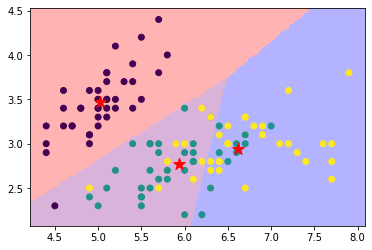

In [77]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny= 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                    zorder=-1)

plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_scaled = scaler.fit_transform(data)

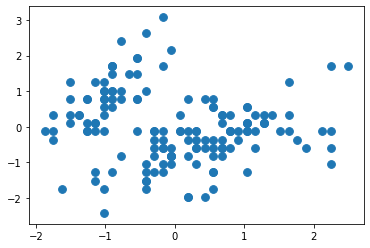

In [84]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [85]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

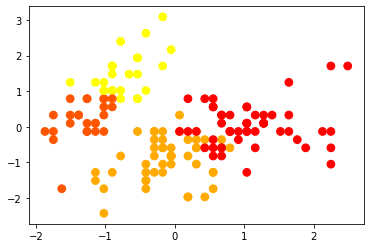

In [87]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [88]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

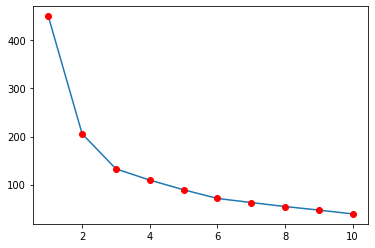

In [89]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Вывод: в зависимости от задачи можно выбрать от 2х до 4х кластеров. Ниже представлена графическая иллюстрация деления на 2 и 3 кластера.

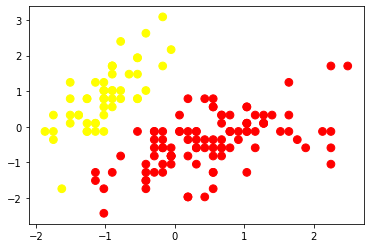

In [90]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

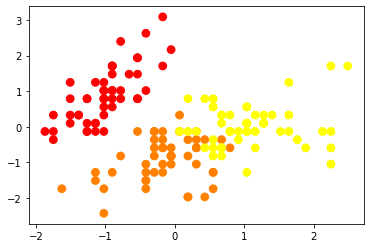

In [91]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)